# Ch. 4

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format
from pysocviz.properties import colors

p9options.figure_size = (6.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

In [2]:
# to handle with categorical variables with na
from pysocviz.utils import redefine_cat_with_na

# In most cases, you may not import them.
# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# dataset packages
from pysocviz.reader import load_dataset
from gapminder import gapminder
import plotnine.data as p9data

gss_sm = load_dataset('gss_sm')
midwest = p9data.midwest
titanic = load_dataset('titanic')
oecd_sum = load_dataset('oecd_sum')

## Fig. 4.1

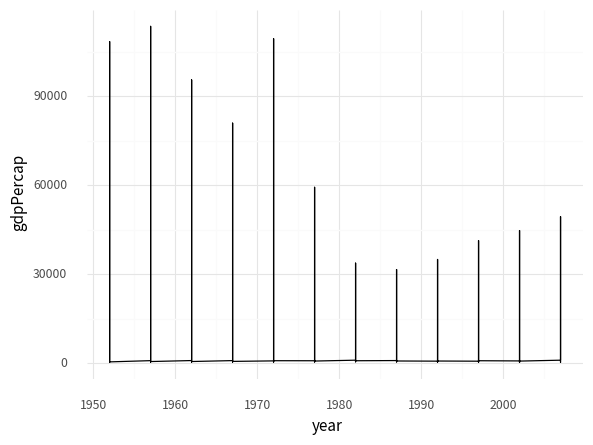

<ggplot: (8764667642763)>

In [3]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line()

## Fig. 4.2

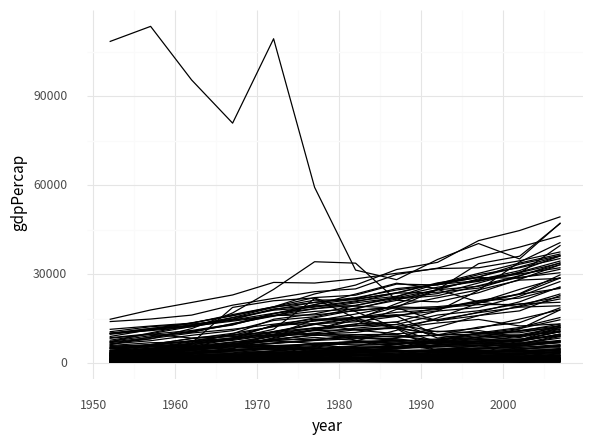

<ggplot: (8764733116320)>

In [4]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country'))

## Fig. 4.3

NOTE: Currently (v0.8) plotnine's aspect ratio is determined by the entire plot, not each facets. So if you want to fix the aspect of each facet plots, you need to specify `aspect_ratio` themeable (it is different from `coord_fixed(ratio=)`).

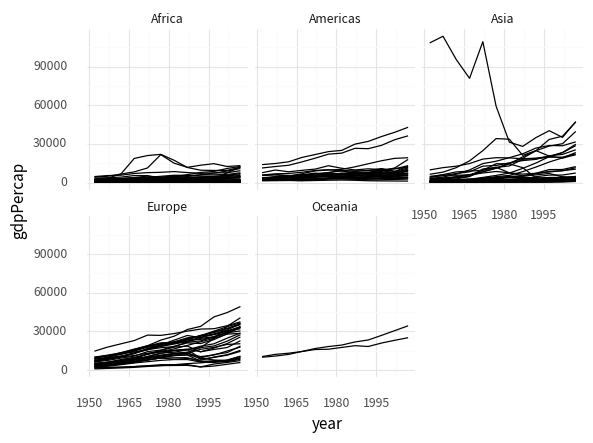

<ggplot: (8764657953687)>

In [5]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country')
) + facet_wrap('continent') + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 5))
) + theme(aspect_ratio=1.0)

## Fig. 4.4

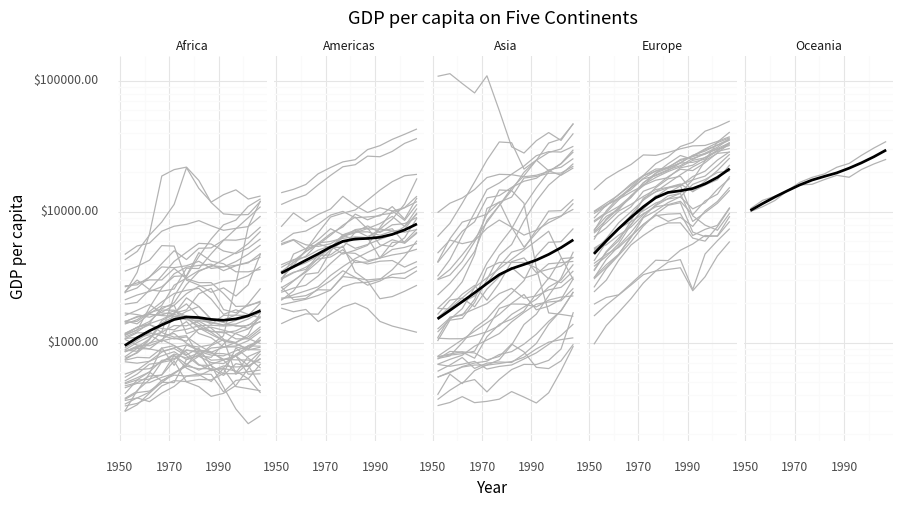

<ggplot: (8764657172983)>

In [6]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(
  aes(group='country'),
  color=colors.get('gray70')
) + geom_smooth(
  size=1.1, method='loess', se=False
) + scale_y_log10(
  labels=dollar_format()
) + facet_wrap(
  'continent', ncol=5
) + labs(
  x="Year",
  y="GDP per capita",
  title="GDP per capita on Five Continents"
) + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 4))
) + theme(figure_size=(10, 5))

## Fig. 4.5

NOTE: Insteadly, formula in `facet_grid()` is able to written by list. e.g., `facet_grid(['sex', 'race'])`. One side formula (e.g., `~s ex`) can be rewritten into `['.', 'sex']`. Using multiple terms is also available (e.g., `~ sex + race` is equivalent to `['.', ['sex', 'race']]`).

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


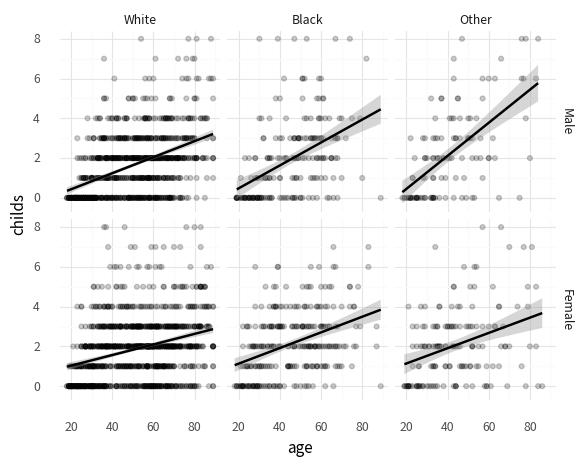

<ggplot: (8764623235991)>

In [7]:
p = ggplot(gss_sm, aes(x='age', y='childs'))
p + geom_point(alpha=0.2) + geom_smooth(
) + facet_grid('sex ~ race')

## Fig. 4.6

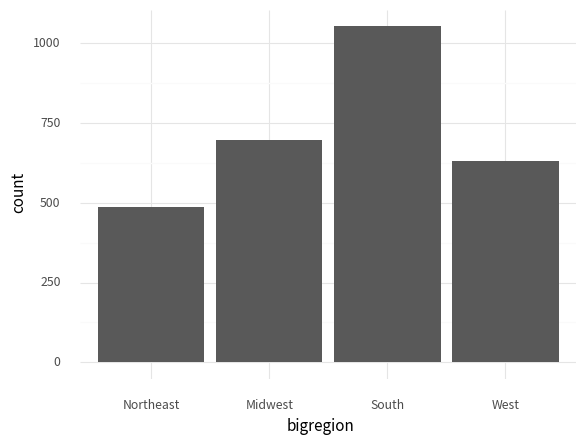

<ggplot: (8764657223804)>

In [8]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar()

## Fig. 4.7

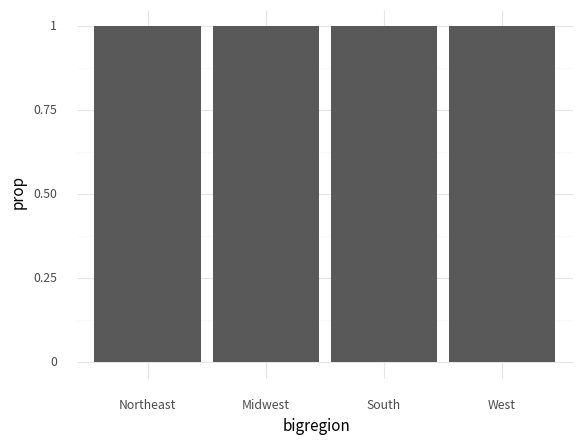

<ggplot: (8764657166514)>

In [9]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y ='..prop..'))

## Fig. 4.8

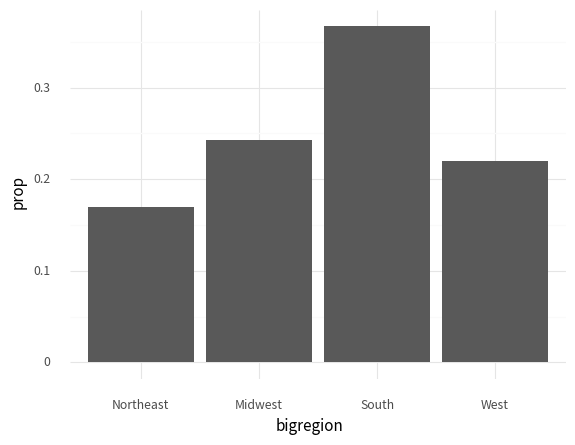

<ggplot: (8764657162244)>

In [10]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y='..prop..', group=1))

## Fig. 4.9

NOTE: Currently (v0.8) Plotnine cannot properly handle categorical variables with missing values. You need to redefine the categorical variable by adding NaN as another level. Pysocviz provides `redefine_cat_with_na()` utility function to handle such variables easily.

NOTE: Ggplot2 automatically assign NA values to a sober color (dark gray), but Plotnine doesn't. Currently (v0.8) you need manual color mapping to imitate ggplot2 ouput.

In [11]:
gss_sm = load_dataset('gss_sm')
gss_sm = gss_sm.assign(religion=lambda d: redefine_cat_with_na(d['religion']))

In [12]:
religion_colors = cm.get_cmap('Set1')
religion_colors = {
  str(gss_sm['religion'].unique()[i]): rgb2hex(religion_colors(i)
    ) for i in range(religion_colors.N) if i < gss_sm['religion'].unique().shape[0]
}
religion_colors['NA'] = '#595959'

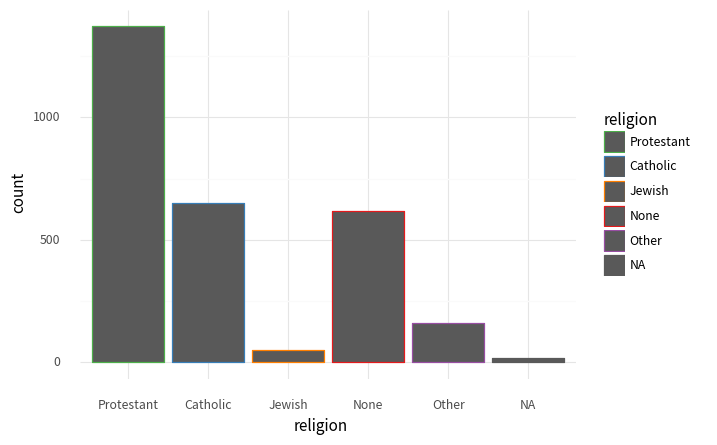

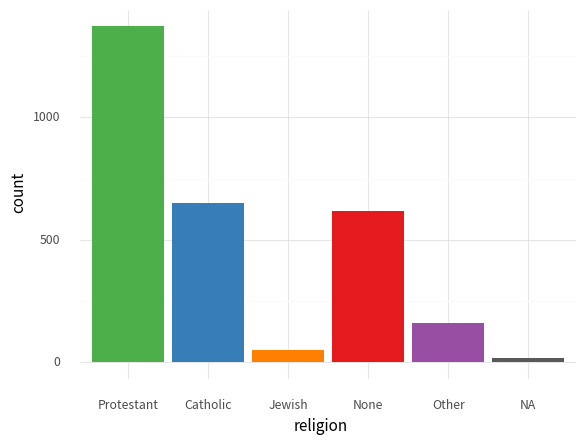

In [13]:
p = ggplot(gss_sm, aes(x='religion', color='religion'))
(p + geom_bar() + scale_color_manual(religion_colors)).draw();

p = ggplot(gss_sm, aes(x='religion', fill='religion'))
(p + geom_bar() + guides(fill=False) + scale_fill_manual(religion_colors)).draw();

## Fig. 4.10

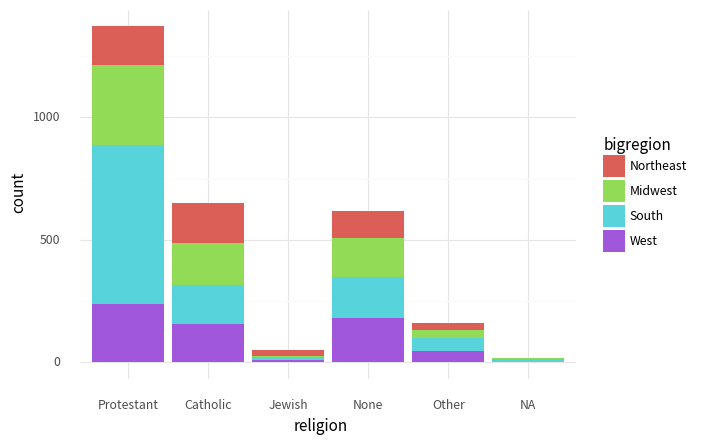

<ggplot: (8764660339484)>

In [14]:
p = ggplot(gss_sm, aes(x='religion', fill='bigregion'))
p + geom_bar()

## Fig. 4.11

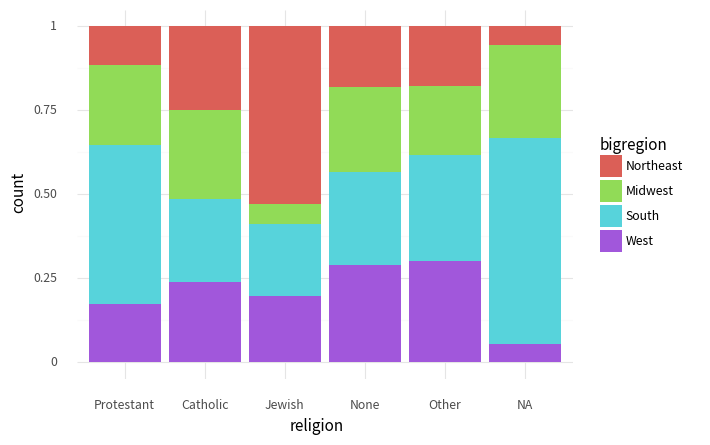

<ggplot: (8764660338794)>

In [15]:
p = ggplot(gss_sm, aes(x='religion', fill='bigregion'))
p + geom_bar(position="fill")

## Fig. 4.12

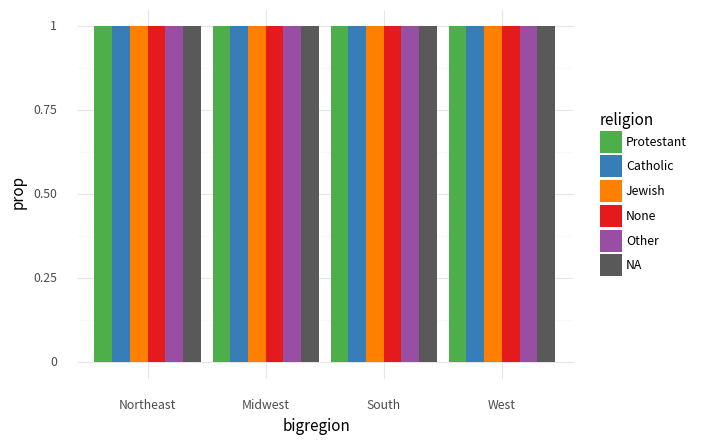

<ggplot: (8764616592740)>

In [16]:
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p + geom_bar(aes(y='..prop..'), position='dodge'
) + scale_fill_manual(religion_colors)

## Fig. 4.13

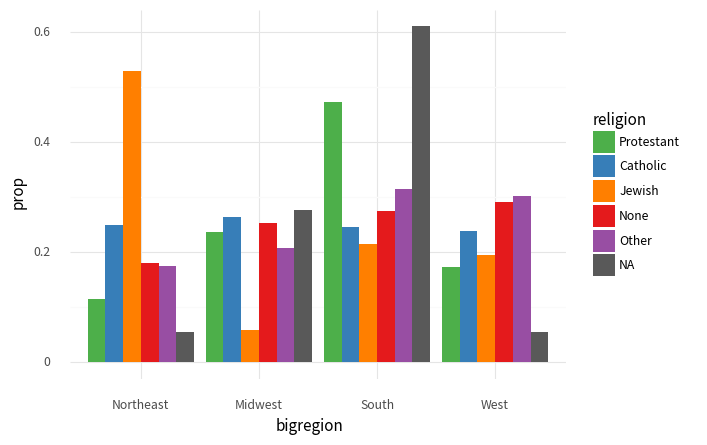

<ggplot: (8764616561818)>

In [17]:
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p + geom_bar(aes(y='..prop..', group='religion'), position='dodge'
) + scale_fill_manual(religion_colors)

## Fig. 4.14

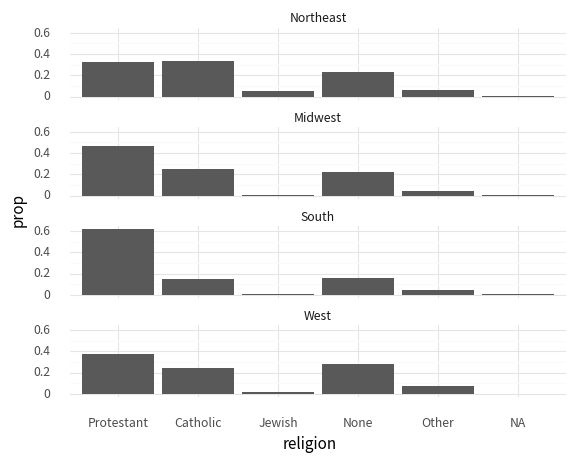

<ggplot: (8764616525963)>

In [18]:
p = ggplot(gss_sm, aes(x='religion'))
p + geom_bar(
  aes(y='..prop..', group='bigregion'), position="dodge"
) + facet_wrap('bigregion', ncol=1)

## Fig. 4.15

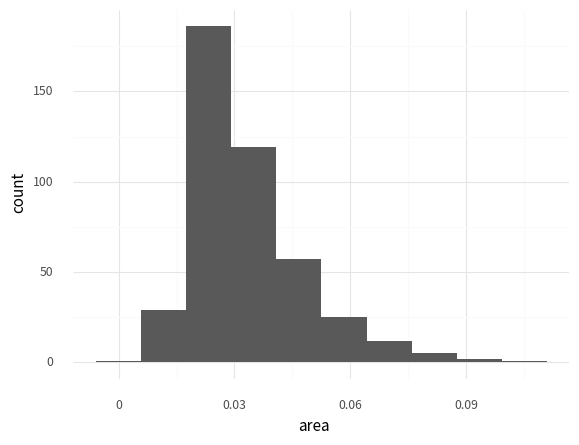

<ggplot: (8764616434908)>

In [19]:
p = ggplot(midwest, aes(x='area'))
p + geom_histogram()
p = ggplot(midwest, aes(x='area'))
p + geom_histogram(bins = 10)

## Fig. 4.16

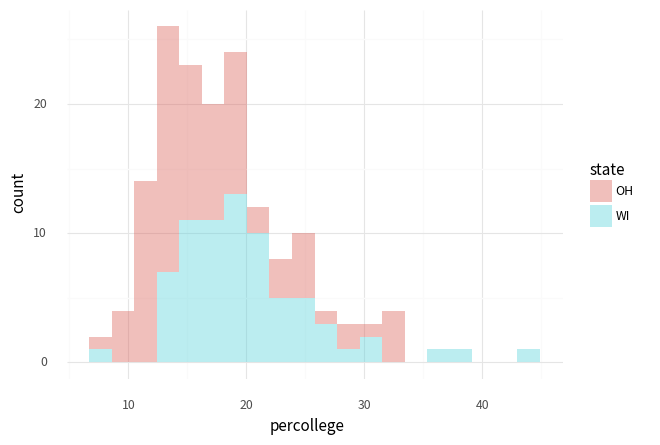

<ggplot: (8764616446892)>

In [20]:
oh_wi = ["OH", "WI"]
p = ggplot(
  midwest.loc[lambda d: d['state'].isin(oh_wi)],
  aes(x='percollege', fill='state'))
p + geom_histogram(alpha=0.4, bins=20)

## Fig. 4.17

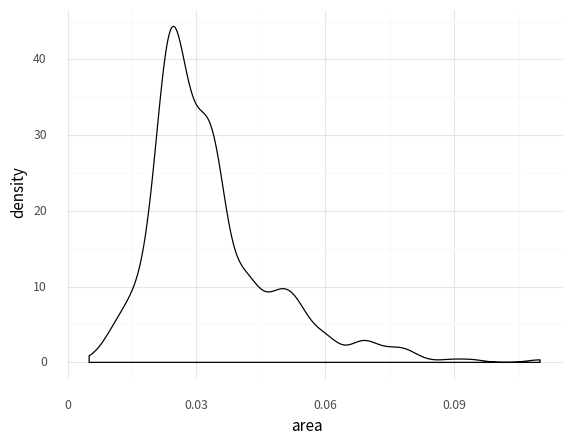

<ggplot: (8764616392849)>

In [21]:
p = ggplot(midwest, aes(x='area'))
p + geom_density()

## Fig. 4.18

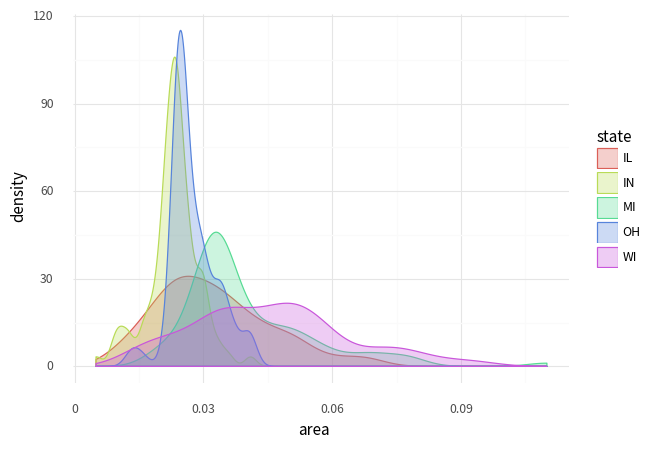

<ggplot: (8764623299633)>

In [22]:
p = ggplot(midwest,
           aes(x='area', fill='state', color='state'))
p + geom_density(alpha=0.3)

## Fig. 4.19

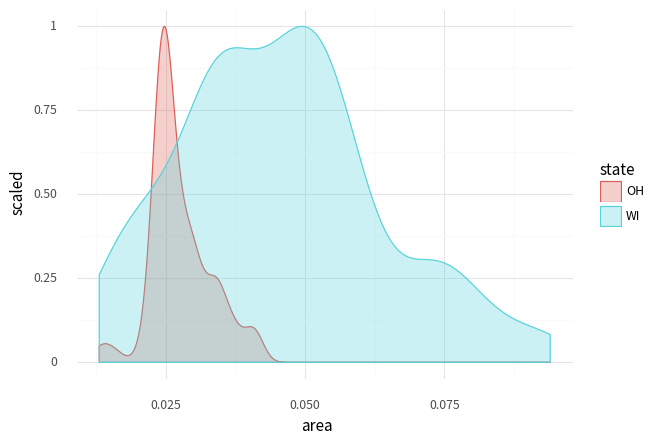

<ggplot: (8764657967851)>

In [23]:
p = ggplot(midwest.loc[lambda d: d['state'].isin(oh_wi)],
           aes(x='area', fill='state', color='state'))
p + geom_density(aes(y='..scaled..'), alpha=0.3)

## Fig. 4.20

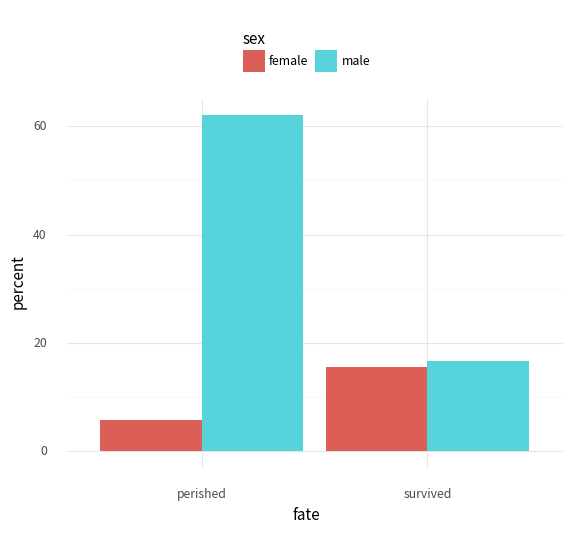

<ggplot: (8764616258765)>

In [24]:
p = ggplot(
    titanic,
    aes(x='fate', y='percent', fill='sex')
)
p + geom_bar(position='dodge', stat='identity') + theme(legend_position="top")

## Fig. 4.21

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


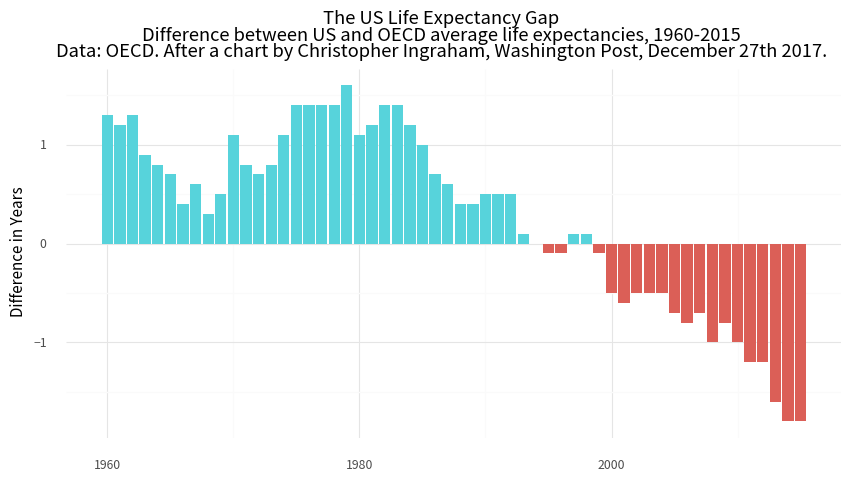

<ggplot: (8764616431074)>

In [25]:
p = ggplot(oecd_sum, aes(x='year', y='diff', fill='hi_lo'))
p + geom_col(
) + guides(fill=False) + labs(
    x=None,
    y="Difference in Years",
    title='\n'.join([
      "The US Life Expectancy Gap",
      "Difference between US and OECD average life expectancies, \
1960-2015",
      "Data: OECD. After a chart by Christopher Ingraham, Washington \
Post, December 27th 2017."
    ]),
    subtitle="Difference between US and OECD average life expectancies, \
1960-2015",
    caption = "Data: OECD. After a chart by Christopher Ingraham, Washington \
Post, December 27th 2017.") + theme(
    figure_size=(10, 4.8)
)